In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import urllib2
from bs4 import BeautifulSoup
import time

In [16]:

soup = BeautifulSoup(urllib2.urlopen('http://www.timeanddate.com/worldclock/astronomy.html?n=78').read())

for row in soup('div', {'id' : 'qfacts'}):
    print row, '\n'

<div class="five columns" id="qfacts"><p><span class="four">Current Time: </span><span id="smct">Oct 17, 2016 at 9:11:47 PM</span></p><br><p><span class="four">Sunrise Today: </span><span class="three">7:56 AM</span><span class="comp sa10" title="Map direction East">↑</span> 105° East<br><span class="four">Sunset Today: </span><span class="three">6:24 PM</span><span class="comp sa22" title="Map direction West">↑</span> 255° West</br></p><br><p><span class="four">Moonrise Today: </span><span class="three">7:35 PM</span><span class="comp sa6" title="Map direction East">↑</span> 69° East<br><span class="four">Moonset Today: </span><span class="three">9:18 AM</span><span class="comp sa26" title="Map direction West">↑</span> 288° West</br></p><br><p><span class="four">Daylight Hours: </span><span title="The current day is 10 hours, 27 minutes long which is 4m 5s shorter than yesterday.">10 hours, 27 minutes (-4m 5s)</span></p></br></br></br></div> 



In [12]:
for row in soup('span', {'class' : 'four'}):
    print row.string, '\n'

Current Time:  

Sunrise Today:  

Sunset Today:  

Moonrise Today:  

Moonset Today:  

Daylight Hours:  



In [19]:
import re

for row in soup('span', {'id' : 'smct'}):
    print row.string
for row in soup('span', {'class' : 'three'}):
    print row.string, '\n'
for row in soup('span', {'title' : 'The Current'}):
    print row.string

SyntaxError: invalid syntax (<ipython-input-19-98d544835685>, line 5)

In [22]:
website = 'http://www.zillow.com/homes/for_sale/Chicago-IL-60657/84654_rid/globalrelevanceex_sort/41.958948,-87.622447,41.916873,-87.681155_rect/13_zm/'
website_data = urllib2.urlopen(website).read()
soup = BeautifulSoup(website_data)

In [25]:
print soup.prettify()

<!DOCTYPE html>
<html class="wf-loading no-js zsg-theme-modernized null" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/product#">
 <head>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="http://fonts.googleapis.com" rel="dns-prefetch"/>
  <link href="http://photos1.zillowstatic.com" rel="dns-prefetch"/>
  <link href="http://photos2.zillowstatic.com" rel="dns-prefetch"/>
  <link href="http://photos3.zillowstatic.com" rel="dns-prefetch"/>
  <meta charset="utf-8"/>
  <title>
   60657 Real Estate - 60657 Homes For Sale  | Zillow
  </title>
  <meta content="Zillow has 504 homes for sale in 60657. View listing photos, review sales history, and use our detailed real estate filters to find the perfect place." name="description"/>
  <meta content="Zillow, Inc." name="author"/>
  <meta content="Copyright (c) 2006-20

### Now we have one "divtag" per zillow card!

In [53]:
print soup('div', {'class' : 'zsg-photo-card-caption'})[0].prettify()

<div class="zsg-photo-card-caption">
 <h4 class="zsg-photo-card-spec">
  <span class="zsg-photo-card-status">
   <span class="zsg-icon-for-sale">
   </span>
   Condo For Sale
  </span>
 </h4>
 <p class="zsg-photo-card-spec">
  <span class="zsg-photo-card-price">
   $379,900
  </span>
  <span class="zsg-photo-card-info">
   2 bds
   <span class="interpunct">
    ·
   </span>
   2 ba
   <span class="interpunct">
    ·
   </span>
   1,200 sqft
  </span>
 </p>
 <p class="zsg-photo-card-spec">
  <span class="zsg-photo-card-notification zsg-icon-arrow-menu-down">
   $18,000 (Sep 8)
  </span>
  <span class="interpunct">
   ·
  </span>
  <span class="zsg-photo-card-address">
   1253 W Melrose St # GE, Chicago, IL
  </span>
 </p>
</div>



In [92]:
data = {}

counter = 0
for divtag in soup('div', {'class' : 'zsg-photo-card-caption'}):
    data[counter] = {}
    for house_price in divtag('span', {'class' : 'zsg-photo-card-price'}):
        data[counter]['price'] = house_price.string
    for address in divtag('span', {'class' : 'zsg-photo-card-address'}):
        data[counter]['address'] = address.string
    for house_info in divtag('span', {'class' : 'zsg-photo-card-info'}):
        data[counter]['house_info'] = house_info.get_text()
    counter += 1

df = pd.DataFrame(data).T

In [133]:
data

{0: {'address': u'1253 W Melrose St # GE, Chicago, IL',
  'house_info': u'2 bds \xb7 2 ba \xb7 1,200 sqft',
  'price': u'$379,900'},
 1: {'address': u'1542 W George St # A, Chicago, IL',
  'house_info': u'3 bds \xb7 2 ba \xb7 2,600 sqft',
  'price': u'$619,000'},
 2: {'address': u'1225 W George St, Chicago, IL',
  'house_info': u'5 bds \xb7 5.5 ba \xb7 7,400 sqft',
  'price': u'$3,995,000'},
 3: {'address': u'415 W Aldine Ave APT 8A, Chicago, IL',
  'house_info': u'3 bds \xb7 3 ba \xb7 2,180 sqft',
  'price': u'$525,000'},
 4: {'address': u'3150 N Lake Shore Dr APT 19C, Chicago, IL',
  'house_info': u'2 bds \xb7 2 ba \xb7 1,650 sqft',
  'price': u'$340,000'},
 5: {'address': u'507 W Aldine Ave APT 1B, Chicago, IL',
  'house_info': u'2 bds \xb7 2 ba \xb7 1,250 sqft',
  'price': u'$470,000'},
 6: {'address': u'1308 W Wellington Ave, Chicago, IL',
  'house_info': u'5 bds \xb7 4 ba \xb7 4,200 sqft',
  'price': u'$2,699,000'},
 7: {'address': u'1625 W Wolfram St, Chicago, IL',
  'house_info

In [93]:
df['bedrooms'] = df['house_info'].apply(lambda x: x.split(u'\xb7')[0])
df['bathrooms'] = df['house_info'].apply(lambda x: x.split(u'\xb7')[1])
df['sq_ft'] = df['house_info'].apply(lambda x: x.strip().split(u'\xb7')[2])
for column in ['bedrooms', 'bathrooms', 'price', 'sq_ft']:
    df[column] = df[column].apply(lambda x: ''.join(ch for ch in x if ch.isdigit()))
    df[column] = df[column].apply(lambda x: 0 if x == '' else x)
    df[column] = df[column].astype(int)

In [94]:
df.drop('house_info', axis=1, inplace=True)
df

,address,price,bedrooms,bathrooms,sq_ft
0,"1253 W Melrose St # GE, Chicago, IL",379900,2,2,1200
1,"1542 W George St # A, Chicago, IL",619000,3,2,2600
2,"1225 W George St, Chicago, IL",3995000,5,55,7400
3,"415 W Aldine Ave APT 8A, Chicago, IL",525000,3,3,2180
4,"3150 N Lake Shore Dr APT 19C, Chicago, IL",340000,2,2,1650
5,"507 W Aldine Ave APT 1B, Chicago, IL",470000,2,2,1250
6,"1308 W Wellington Ave, Chicago, IL",2699000,5,4,4200
7,"1625 W Wolfram St, Chicago, IL",1499900,5,4,4200
8,"1816 W Nelson St, Chicago, IL",1599000,5,5,5000
9,"2825 N Halsted St # 2S, Chicago, IL",710000,3,2,1647


In [95]:
df.dtypes

address      object
price         int64
bedrooms      int64
bathrooms     int64
sq_ft         int64
dtype: object

In [96]:
df[['bedrooms', 'bathrooms', 'price', 'sq_ft']].corr()

,bedrooms,bathrooms,price,sq_ft
bedrooms,1.000000,0.401609,0.710618,0.475163
bathrooms,0.401609,1.000000,0.805443,0.665686
price,0.710618,0.805443,1.000000,0.804249
sq_ft,0.475163,0.665686,0.804249,1.000000


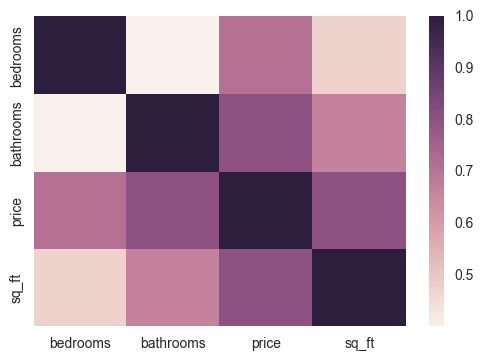

In [102]:
sns.heatmap(df[['bedrooms', 'bathrooms', 'price', 'sq_ft']].corr())
plt.show()

In [105]:
url = 'http://pitchfork.com/reviews/albums/?page=1'
req = urllib2.Request(url, headers={'User-Agent' : "Magic Browser"}) 
url_data = urllib2.urlopen(req).read()
soup = BeautifulSoup(url_data)

In [107]:
print soup.prettify()

<!DOCTYPE html>
<html>
 <head>
  <title data-react-helmet="true">
   New Albums &amp; Music Reviews | Pitchfork
  </title>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=no" data-react-helmet="true" name="viewport"/>
  <meta content="The most trusted voice in music." data-react-helmet="true" name="description"/>
  <meta content="website" data-react-helmet="true" name="og:type"/>
  <meta content="Pitchfork" data-react-helmet="true" name="og:site_name"/>
  <meta content="Pitchfork" data-react-helmet="true" name="og:title"/>
  <meta content="The most trusted voice in music." data-react-helmet="true" name="og:description"/>
  <meta content="http://pitchfork.com" data-react-helmet="true" name="og:url"/>
  <link data-react-helmet="true" href="http://cdn.pitchfork.com/assets/misc/favicon-32.png" rel="shortcut icon" type="image/png"/>
  <link data-react-helmet="true" href="http://cdn.pitchfork.com/assets/misc/favicon-32.png" rel="icon" sizes="32x32" type="image/png"/>
  

In [108]:
for a in soup('a', {'class' : 'album-link'})[0:3]:
    print a.prettify()

<a class="album-link" data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0" href="/reviews/albums/22494-building-a-beginning/">
 <div class="artwork " data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.0">
  <div class="" data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.0.0">
   <img data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.0.0.0" src="http://cdn4.pitchfork.com/albums/23935/list.14e59ca9.jpg"/>
  </div>
 </div>
 <div class="album-artist" data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.1">
  <ul class="artist-list" data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.1.0">
   <li data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.1.0.$artist-nolink-2475">
    Jamie Lidell
   </li>
  </ul>
  <h2 class="title" data-reactid=".104focdmbcw.1.5:0.1.1.0.$/=10.1.0.$album-coll-22494.0.1.1">
   Building a Beginning
  </h2>
 </div>
</a>

<a class="album-link" dat

In [109]:
url = 'http://pitchfork.com/reviews/albums/22494-building-a-beginning/'
req = urllib2.Request(url, headers={'User-Agent' : "Magic Browser"}) 
url_data = urllib2.urlopen(req).read()
soup = BeautifulSoup(url_data)

In [111]:
print soup.prettify()

<!DOCTYPE html>
<html>
 <head>
  <title data-react-helmet="true">
   Jamie Lidell: Building a Beginning Album Review | Pitchfork
  </title>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=no" data-react-helmet="true" name="viewport"/>
  <meta content="The most trusted voice in music." data-react-helmet="true" name="description"/>
  <meta content="Pitchfork" data-react-helmet="true" name="og:site_name"/>
  <meta content="http://pitchfork.com" data-react-helmet="true" name="og:url"/>
  <meta content="Jamie Lidell: Building a Beginning" data-react-helmet="true" name="og:title"/>
  <meta content="On Building A Beginning, Jamie Lidell unplugs his laptop for the most conventional R&amp;amp;B album of his career." data-react-helmet="true" name="og:description"/>
  <meta content="article" data-react-helmet="true" name="og:type"/>
  <meta content="http://cdn.pitchfork.com/albums/23935/14e59ca9.jpg" data-react-helmet="true" name="og:image"/>
  <meta content="summary_large_i

In [130]:
for script in (soup('script', {'type' : 'application/ld+json'})):
    print script.prettify()

<script data-react-helmet="true" type="application/ld+json">
 {"@context":"http://schema.org","@type":"NewsArticle","headline":"Jamie Lidell : Building a Beginning | 6.2","url":"http://pitchfork.com/reviews/albums/22494-building-a-beginning/","thumbnailUrl":"http://cdn.pitchfork.com/albums/23935/14e59ca9.jpg","dateCreated":"2016-10-17T05:00:00.000Z","articleSection":"reviews","creator":"Evan Rytlewski","keywords":["Jamie Lidell","Pop/R&B"]}
</script>



In [132]:
url = 'http://pitchfork.com/reviews/albums/4338-get-born/'
req = urllib2.Request(url, headers={'User-Agent' : "Magic Browser"}) 
url_data = urllib2.urlopen(req).read()
soup = BeautifulSoup(url_data)

for script in (soup('script', {'type' : 'application/ld+json'})):
    print script.get_text()

{"@context":"http://schema.org","@type":"NewsArticle","headline":"Jet : Get Born | 3.7","url":"http://pitchfork.com/reviews/albums/4338-get-born/","thumbnailUrl":"http://cdn2.pitchfork.com/albums/4288/0fcbfa42.jpg","dateCreated":"2003-10-30T06:00:02.000Z","articleSection":"reviews","creator":"Nick Sylvester","keywords":["Jet","Rock","Electronic"]}
